# Prepare Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/AI_Advanced_CK/NLP/2_IMDB_reviews') # Chỉ định nơi làm việc (terminal)

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSZQQKE/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSZQQKE/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSZQQKE/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']
train_sentences = []
test_sentences = []
train_labels = []
test_labels = []

In [ ]:
# first_element = next(iter(train_data.take(1)))

In [ ]:
for s,l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())
for s,l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [ ]:
print(len(train_sentences))
print(len(train_labels))

25000
25000


## Add Vocab

In [ ]:
# s = 'Nguyen Van Manh'
s = 'Nguyễn Văn Mạnh'
train_sentences.append(s)
l = 1
train_labels = np.append(train_labels, l)

print(train_sentences[-1])
print(train_labels[-1])

Nguyễn Văn Mạnh
1


In [ ]:
print(len(train_sentences))
print(len(train_labels))
print(train_sentences[0])
print(train_labels[0])
print(train_labels) # label chỉ có 2 nhãn : 0 và 1

25001
25001
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
[0 0 0 ... 0 1 1]


In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Const - Variable

In [ ]:
vocab_size = 10000
embedding = 64
embedding_dim = 128  # Kích thước vector nhúng
max_length = 140 # 140 , 256
units = 128

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer (num_words=vocab_size, oov_token="<OOV>")
# tokenizer.fit_on_texts (train_sentences + test_sentences)
tokenizer.fit_on_texts (train_sentences + test_sentences + ['Nguyễn Văn Mạnh']) # Cách 2

In [ ]:
train_sentences = tokenizer.texts_to_sequences(train_sentences)
padded_train_sentences = pad_sequences (train_sentences, maxlen=max_length, truncating='post', padding='post')

In [ ]:
word_index = tokenizer.word_index

In [ ]:
print(word_index['romance'])
print(word_index['nguyen'])
print(word_index['van'])
# đầu vào là 'Nguyễn Văn Mạnh'
print(word_index['nguyễn'])
print(word_index['văn'])
print(word_index['mạnh']) # sẽ chuyển thành in thường hết

900
28201
1090
65341
65342
65343


In [ ]:
# Từ index lấy ra word
reverse_word_index = {index: word for word, index in word_index.items()}
print(reverse_word_index[890])
print(reverse_word_index[24111])
print(reverse_word_index[1186])
print(reverse_word_index[86540])
print(reverse_word_index[86541])
print(reverse_word_index[86542])

america
eurovision
kills
splatterfest'
doogie
howser


In [ ]:
print(train_sentences[0])

[59, 12, 14, 35, 431, 391, 16, 175, 29, 1, 9, 33, 1482, 3915, 41, 508, 9901, 197, 25, 84, 153, 19, 12, 205, 339, 29, 70, 246, 214, 9, 493, 62, 70, 84, 117, 99, 24, 5849, 12, 3417, 660, 788, 12, 16, 7, 35, 413, 9084, 179, 2348, 425, 2, 92, 1170, 138, 73, 148, 54, 2, 1, 6568, 73, 233, 70, 3128, 18, 1, 3133, 1, 1, 1556, 4755, 3, 43, 3854, 116, 1529, 17, 3915, 14, 163, 19, 4, 1170, 901, 9085, 9, 4, 16, 13, 14, 3905, 5, 102, 149, 1179, 11, 234, 691, 13, 44, 25, 101, 39, 12, 8242, 9467, 39, 1482, 1, 52, 398, 11, 99, 1204, 855, 146, 10]


In [ ]:
test_sentences = tokenizer.texts_to_sequences (test_sentences)
padded_test_sentences = pad_sequences(test_sentences, maxlen=max_length, truncating='post', padding='post')

In [ ]:
print(test_sentences[0])

[59, 44, 25, 108, 13, 97, 3881, 18, 760, 5420, 10, 14, 319, 5, 2, 598, 357, 18, 1663, 1416, 1, 18, 625, 9063, 4804, 1, 737, 6, 13, 1026, 1, 1, 431, 503, 1, 4, 1, 349, 3725, 20, 233, 3, 15, 5995, 3, 15, 1669, 15, 102, 5, 2, 3987, 101, 11, 1460, 1475, 12, 251, 235, 11, 212, 2, 373, 5320, 3, 62, 96, 11, 175, 106, 11, 1475, 183, 12, 251, 37, 6, 1100, 1, 644, 7, 4387, 1, 4, 1, 349, 7, 37, 9284, 373, 5, 1455, 1, 13, 30, 64, 28, 6, 855, 178, 17, 4, 974, 5, 12, 225, 3, 82, 4, 355, 33, 355, 6061, 5, 10, 6, 1429, 1133, 2, 5475, 1, 3, 1, 5, 10, 172, 324, 7, 1305, 4195, 4, 765, 2050, 5, 4, 250, 2743, 158, 3, 2, 379, 31, 186, 25, 1215, 505, 632, 5, 2, 125, 2, 351, 1326, 7554, 30, 1, 874, 38, 4, 20, 39, 12, 1, 4, 1, 349, 7, 4, 20, 655, 61, 49, 215]


In [ ]:
padded_train_sentences
# padded_train_sentences.shape

array([[  59,   12,   14, ...,    0,    0,    0],
       [ 252,   28,   80, ...,    0,    0,    0],
       [   1, 6798,    2, ...,    0,    0,    0],
       ...,
       [2731,   11,  212, ..., 1046,   37,   31],
       [3990,    5,   31, ...,    1, 2570,   41],
       [   1,    1,    1, ...,    0,    0,    0]], dtype=int32)

# Model

## RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

rnn_model  = Sequential()
rnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
rnn_model.add(SimpleRNN(units))
rnn_model.add(Dense(10, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1314197 (5.01 MB)
Trainable params: 1314197 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- input_dim là output của lớp trước
- Embedding : Param = embedding*vocab_size = 64 * 10000 = 640000    
- SimpleRNN : Param = (units * units + units * input_dim + units) = (128 * 128 + 128 * 64 + 128) =  24704 (output của lớp trước = 64 chính là embending)
- Dense : Param = output_dim * input_dim + output_dim = 10 * 128 + 10 = 1290 (mấy lớp FC thì cũng tính giống như bên CNN)
- Dense : Param = output_dim * input_dim + output_dim = 1 * 10 + 1 = 11

- Total Param = 640000 + 24704 + 1290 + 11 = 666005

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
lstm_model.add(LSTM(units))
lstm_model.add(Dense(10, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 140, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1412885 (5.39 MB)
Trainable params: 1412885 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- input_dim là output của lớp trước
- Embedding : Param = embedding*vocab_size = 64 * 10000 = 640000    
- LSTM = RNN * 4 : Param = (units * units + units * input_dim + units) * 4 = (128 * 128 + 128 * 64 + 128) * 4  =  24704 * 4 = 98816 (output của lớp trước = 64 chính là embending)
- Dense : Param = output_dim * input_dim + output_dim = 10 * 128 + 10 = 1290 (mấy lớp FC thì cũng tính giống như bên CNN)
- Dense : Param = output_dim * input_dim + output_dim = 1 * 10 + 1 = 11

- Total Param = 640000 + 98816 + 1290 + 11 = 740117  

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Flatten
# lstm_model2 = Sequential()
# lstm_model2.add(Embedding(vocab_size, embedding, input_length = max_length)) # embedding ở đây chính là output_dim
# lstm_model2.add(Flatten())
# # lstm_model2.add(LSTM(embedding)) # embedding node ẩn ???
# lstm_model2.add(Dense(10, activation='relu'))
# lstm_model2.add(Dense(1, activation='sigmoid'))
# lstm_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# lstm_model2.summary()

## BiLSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
bilstm_model.add(Bidirectional(LSTM(units)))
bilstm_model.add(Dense(10, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bilstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 140, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1545749 (5.90 MB)
Trainable params: 1545749 (5.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


( bidirectional (Bidirectional  (None, 256)  thì unit là 128))
- input_dim là output của lớp trước
- Embedding : Param = embedding*vocab_size = 64 * 10000 = 640000    
- BiLSTM = LSTM * 2 = RNN * 4 * 2  : Param = (units * units + units * input_dim + units) * 4 * 2 = (128 * 128 + 128 * 64 + 128) * 4 * 2  =  24704 * 4 = 197632 (output của lớp trước = 64 chính là embending)
- Dense : Param = output_dim * input_dim + output_dim = 10 * 256 + 10 = 2570 (mấy lớp FC thì cũng tính giống như bên CNN)
- Dense : Param = output_dim * input_dim + output_dim = 1 * 10 + 1 = 11

- Total Param = 640000 + 197632 + 2570 + 11 = 840213   

## Testing Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

new_model = Sequential()
new_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
new_model.add(LSTM(units=128, return_sequences=True))
new_model.add(Dropout(0.5))
new_model.add(LSTM(units=128))
new_model.add(Dropout(0.5))
new_model.add(Dense(10, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 140, 128)          1280000   
                                                                 
 lstm_2 (LSTM)               (None, 140, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 140, 128)          0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 1)                

# Fit Model

In [ ]:
# model = rnn_model
# model = lstm_model
# model = lstm_model2
model = bilstm_model
# model = new_model

In [ ]:
# Callbacks
# patience = n // sau n eporch mà val_loss không được cải thiện thì dừng train
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)
checkpoint = ModelCheckpoint('./Manh_Save/best_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
H = bilstm_model.fit(padded_train_sentences, train_labels, epochs=10,
                            validation_data=(padded_test_sentences, test_labels),
                            callbacks=[early_stopping, checkpoint])

# Accessing training history
print("Training History:", H.history)

Epoch 1/10
782/782 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.7758
Epoch 1: val_loss improved from inf to 0.39477, saving model to ./Manh_Save/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 47s 54ms/step - loss: 0.4644 - accuracy: 0.7758 - val_loss: 0.3948 - val_accuracy: 0.8332
Epoch 2/10
782/782 [==============================] - ETA: 0s - loss: 0.2834 - accuracy: 0.8861
Epoch 2: val_loss improved from 0.39477 to 0.38586, saving model to ./Manh_Save/best_model.h5
782/782 [==============================] - 20s 26ms/step - loss: 0.2834 - accuracy: 0.8861 - val_loss: 0.3859 - val_accuracy: 0.8303
Epoch 3/10
782/782 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9222
Epoch 3: val_loss did not improve from 0.38586
782/782 [==============================] - 18s 23ms/step - loss: 0.2077 - accuracy: 0.9222 - val_loss: 0.4602 - val_accuracy: 0.8262
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.1372 - accuracy: 0.9514
Epoch 4: val_loss did not improve from 0.38586
782/782 [==============================] - 16s 21ms/step - loss: 0.1372 - accuracy: 0.9514 - val_loss: 0.5215 - val_accuracy:

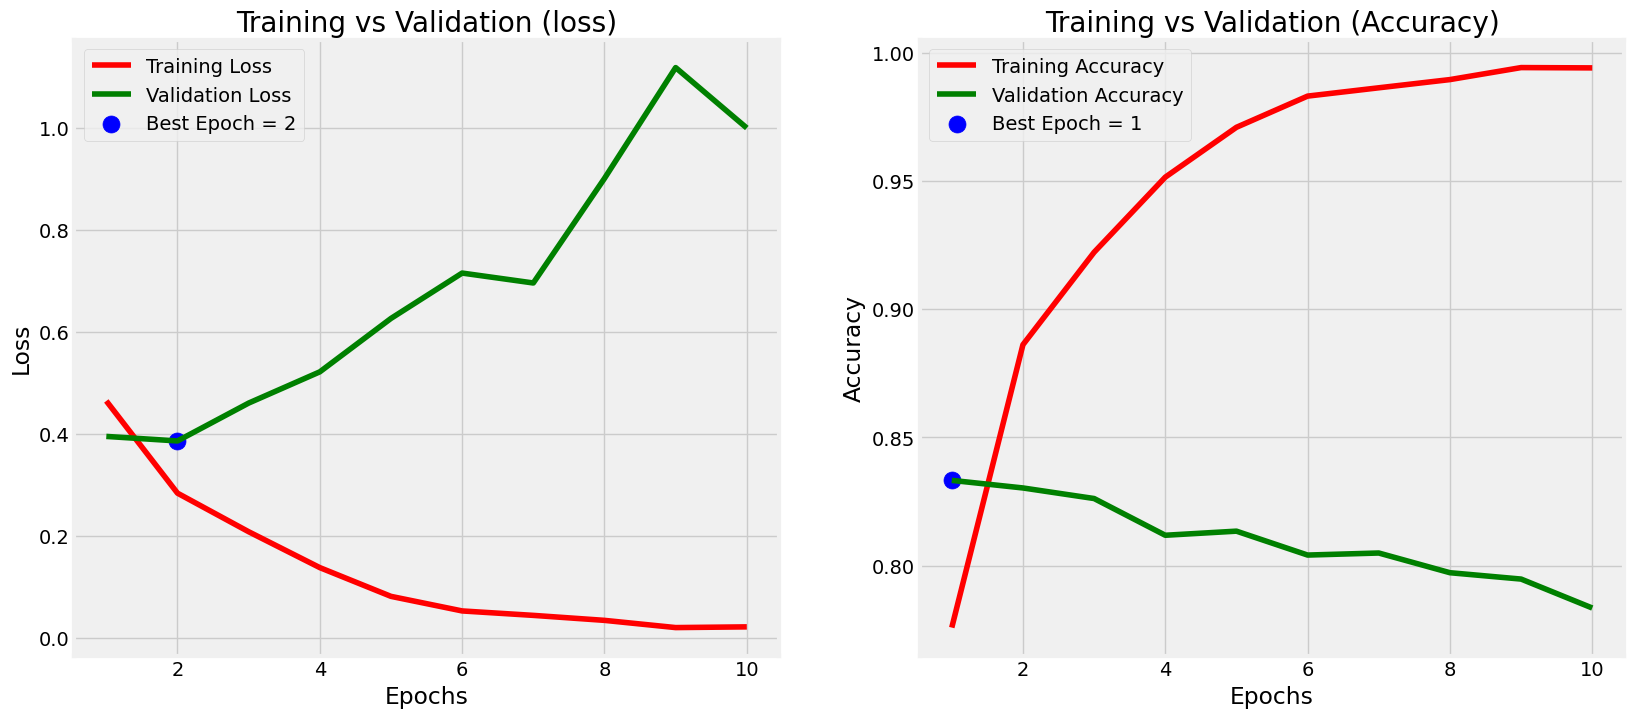

In [ ]:
train_acc = H.history['accuracy']
train_loss = H.history['loss']

val_acc = H.history['val_accuracy']
val_loss = H.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
# import numpy as np
# # Chuyển đổi dữ liệu nhãn thành mảng NumPy
# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)
# # Tiếp tục sử dụng phương thức fit
# model.fit(padded_test_sentences, train_labels, epochs=10, validation_data=(padded_test_sentences, test_labels))

# Test

## Write TSV

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # (10000, 64)

(10000, 128)

In [ ]:
import io
out_v = io.open('./Manh_Save/vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('./Manh_Save/meta.tsv', 'w', encoding = 'utf-8')
for idx in range(1, vocab_size):
  word = tokenizer.index_word[idx]
  vector = weights[idx]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in vector]) + '\n')
out_m.close()
out_v.close()

## Predict

In [ ]:
# Test the model with an additional sentence
additional_test_sen = ['this movie is amazing']
additional_test_seq = tokenizer.texts_to_sequences(additional_test_sen)
padded_additional_test_seq = pad_sequences(additional_test_seq, maxlen=max_length, truncating='post', padding='post')
print(padded_additional_test_seq)
print(padded_additional_test_seq.shape)

# Predict sentiment of the additional test sentence
additional_prediction = model.predict(padded_additional_test_seq)

# Round the sentiment prediction to get binary output
binary_prediction = 1 if additional_prediction >= 0.5 else 0
print("Binary sentiment prediction for 'this movie is amazing':", binary_prediction)

[[ 12  16   7 503   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
(1, 140)
1/1 [==============================] - 1s 672ms/step
Binary sentiment prediction for 'this movie is amazing': 1


## Weight

In [ ]:
word = 'nguyễn'

if word in tokenizer.word_index:
    position = tokenizer.texts_to_sequences([word])
    weights = model.layers[0].get_weights()[0]
    print(weights[position])
else:
    print("Từ '{}' không có trong từ điển.".format(word))


[[[-0.00338431  0.01271006 -0.0324277  -0.00333755  0.02497007
    0.03820827 -0.01451031  0.02704684  0.02790865  0.00119473
    0.00656582 -0.08877929  0.01636581  0.02364398 -0.01972328
    0.02759842  0.00710678  0.03469702  0.06069586  0.08119077
    0.02013464  0.00193716 -0.04932567 -0.04052107  0.04258067
   -0.02779968 -0.0744701  -0.03503162 -0.04560817  0.03027615
   -0.04799732  0.00539721  0.00387592  0.01526093  0.03350756
    0.09772185 -0.0545036   0.05888258 -0.0540306  -0.02614203
   -0.03875083  0.07586722 -0.00308903 -0.01041349  0.02423635
    0.03116608  0.06429504  0.0298207   0.05801374  0.03216273
    0.02286775 -0.01795828  0.0269727   0.00349673  0.03724831
   -0.04052064  0.0021012  -0.03981329 -0.10739908  0.08090602
   -0.02433489 -0.04714344  0.02150707 -0.06725803 -0.03230797
   -0.03483434 -0.00219954  0.04976007 -0.09360714  0.03736215
    0.00117834  0.00023516 -0.03735572  0.02129288  0.01291312
   -0.04894763 -0.02479769 -0.04692276  0.04154201  0.0

## Embedings Từ

In [ ]:
word = 'nguyễn'

modelx = Sequential()
modelx.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

if word in tokenizer.word_index:
    position = tokenizer.texts_to_sequences([word])
    print(f"Chỉ số của từ '{word}':", position[0][0])
    print("Chuỗi chứa chỉ số của từ:", position)
    embedding_of_word = modelx.predict(position)
    print(f"Embedding của từ '{word}':", embedding_of_word)

else:
    print("Từ '{}' không có trong từ điển.".format(word))

Chỉ số của từ 'nguyễn': 1
Chuỗi chứa chỉ số của từ: [[1]]
1/1 [==============================] - 0s 46ms/step
Embedding của từ 'nguyễn': [[[-0.04798789  0.00154535 -0.01864877 -0.02765386 -0.02538327
   -0.01134669  0.01508288  0.04902894 -0.04197513  0.03729862
    0.0096586  -0.0200215  -0.01969091 -0.04948069 -0.02724462
   -0.01101137 -0.03551374 -0.00080206 -0.01610069  0.04355717
   -0.04393224  0.04942924 -0.03753757  0.00760126 -0.00230826
   -0.01442634  0.01130818  0.02646787 -0.02733184  0.00666007
    0.04381026 -0.04213185  0.03366618  0.01549759  0.02707206
   -0.02483361  0.00419302  0.04316068  0.00520741  0.03552823
    0.02410397 -0.01518279 -0.04563617  0.03975977 -0.03999499
    0.0189306   0.04704013  0.03493233 -0.03864308 -0.04112573
   -0.04898709 -0.02092811  0.02735063  0.04729129  0.02222032
    0.04561995  0.01664535  0.04484105  0.02957784 -0.01702059
    0.02598853  0.03986594  0.02470534  0.04820358 -0.0356336
    0.01411027 -0.03488053 -0.03408875  0.042

## Embedings Câu

In [ ]:
additional_test_sen = ["nguyễn văn mạnh là ai vậy ?"]
additional_test_seq = tokenizer.texts_to_sequences(additional_test_sen)
padded_additional_test_seq = pad_sequences(additional_test_seq, maxlen=max_length, truncating='post', padding='post')
print("Chuỗi chứa chỉ số của câu:", padded_additional_test_seq)

# Predict sentiment of the additional test sentence
modelx = Sequential()
modelx.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

# Lấy embedding của chuỗi
embeddings = modelx.predict(padded_additional_test_seq)
print("Embeddings:", embeddings)

Chuỗi chứa chỉ số của câu: [[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1/1 [==============================] - 0s 33ms/step
Embeddings: [[[ 0.04965464  0.0366665  -0.03921013 ...  0.01289811  0.0115652
   -0.00071317]
  [ 0.04965464  0.0366665  -0.03921013 ...  0.01289811  0.0115652
   -0.00071317]
  [ 0.04965464  0.0366665  -0.03921013 ...  0.01289811  0.0115652
   -0.00071317]
  ...
  [-0.02679761 -0.02271774 -0.02488076 ...  0.03826066  0.01338102
   -0.04966202]
  [-0.02679761 -0.02271774 -0.02488076 ...  0.03826066  0.01338102
   -0.04966202]
  [-0.02679761 -0.02271774 -0.02488076 ...  0.03826066  0.01338102
   -0.04966202]]]
